In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import tensorflow as keras
np.random.seed(1000)

pickle_in = open("X2.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y2.pickle","rb")
y = pickle.load(pickle_in)
from tensorflow.keras.utils import to_categorical
X = X/255.0
pickle_in = open("X3.pickle","rb")
X_validation = pickle.load(pickle_in)
pickle_in = open("y3.pickle","rb")
y_validation = pickle.load(pickle_in)
from tensorflow.keras.utils import to_categorical
X = X/255.0
X_validation=X_validation/255.0
y_validation=to_categorical(y_validation)



#Instantiate an empty model
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(150,150,1), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(150*150*1,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))
model.summary()
# Compile the model


optimizer='Adam'
loss='categorical_crossentropy'
metrics=['accuracy']



model.compile(optimizer, loss=loss, metrics=metrics)


history=model.fit(
  X,
  to_categorical(y),
  epochs=20,
  validation_data=(X_validation,y_validation));


print(model.summary())
model.save('Covid_Phenomena_2.model')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 38, 38, 96)        11712     
_________________________________________________________________
activation_33 (Activation)   (None, 38, 38, 96)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 19, 19, 96)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 19, 19, 256)       2973952   
_________________________________________________________________
activation_34 (Activation)   (None, 19, 19, 256)       0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 384)      

ValueError: A target array with shape (753, 3) was passed for an output of shape (None, 17) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

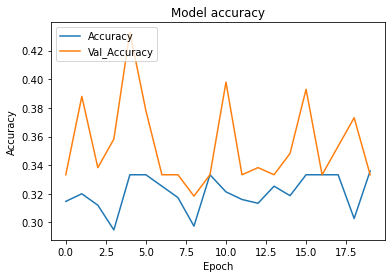

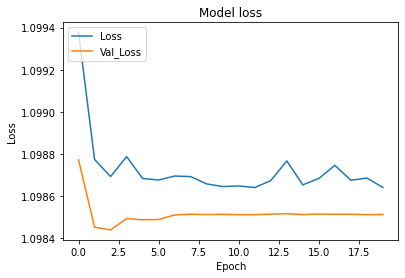

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()